In [8]:
import yfinance as yf

from dotenv import load_dotenv
import os

load_dotenv()


True

In [32]:

# Define the ticker symbol
ticker_symbol = "TSLA"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1mo")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
# actions = ticker.actions
# print("\nStock Actions:")
# print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-10-07 00:00:00-04:00  249.000000  249.830002  240.699997  240.830002   
2024-10-08 00:00:00-04:00  243.559998  246.210007  240.559998  244.500000   
2024-10-09 00:00:00-04:00  243.820007  247.429993  239.509995  241.050003   
2024-10-10 00:00:00-04:00  241.809998  242.789993  232.339996  238.770004   
2024-10-11 00:00:00-04:00  220.130005  223.339996  214.380005  217.800003   
2024-10-14 00:00:00-04:00  220.130005  221.910004  213.740005  219.160004   
2024-10-15 00:00:00-04:00  220.009995  224.259995  217.119995  219.570007   
2024-10-16 00:00:00-04:00  221.399994  222.820007  218.929993  221.330002   
2024-10-17 00:00:00-04:00  221.589996  222.080002  217.899994  220.889999   
2024-10-18 00:00:00-04:00  220.710007  222.279999  219.229996  220.699997   
2024-10-21 00:00:00-04:00  218.899994  220.479996  215.7299

In [33]:
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-07 00:00:00-04:00,249.000000,249.830002,240.699997,240.830002,68113300,0.0,0.0
2024-10-08 00:00:00-04:00,243.559998,246.210007,240.559998,244.500000,56303200,0.0,0.0
2024-10-09 00:00:00-04:00,243.820007,247.429993,239.509995,241.050003,66289500,0.0,0.0
2024-10-10 00:00:00-04:00,241.809998,242.789993,232.339996,238.770004,83087100,0.0,0.0
2024-10-11 00:00:00-04:00,220.130005,223.339996,214.380005,217.800003,142628900,0.0,0.0


<Axes: xlabel='Date'>

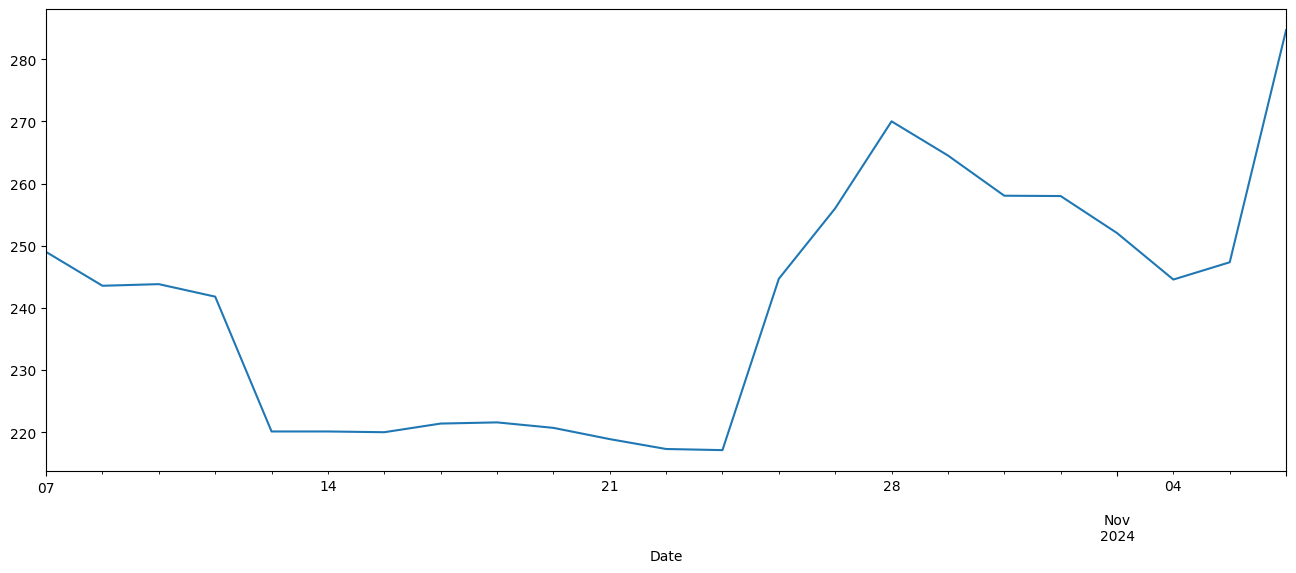

In [38]:
df['Open'].plot(figsize=(16, 6))

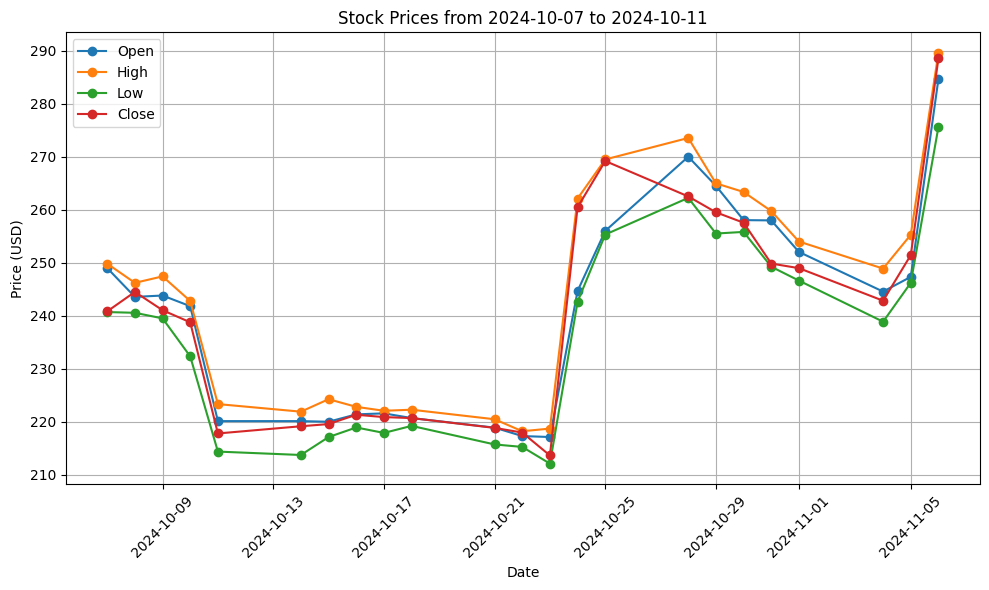

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the historical data
df = historical_data

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Open"], label="Open", marker='o')
plt.plot(df.index, df["High"], label="High", marker='o')
plt.plot(df.index, df["Low"], label="Low", marker='o')
plt.plot(df.index, df["Close"], label="Close", marker='o')

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
from cerebras.cloud.sdk import Cerebras

client = Cerebras(
    # This is the default and can be omitted
    api_key=os.environ.get("CEREBRAS_API_KEY"),
)

prompt = f"""
You are given market data on a stock. From a scale of 1 to 10, with 
1 being strong sell, 10 being strong buy, and 5 being hold, What would you rate this stock?
Also can you predict what stock is this based on the data?

data:
{historical_data}
"""

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
],
    model="llama3.1-8b",
)

print(chat_completion.choices[0].message.content)

Based on the given market data, I would rate this stock an 8 out of 10, indicating a strong buy.

The stock has shown a steady increase in price over the past month, with several days of significant gains. The highest high and lowest low are also relatively close, indicating a strong and stable market.

The daily trading volume has also increased, with a few days exceeding 60 million shares. This increased trading activity suggests a growing investor interest in the stock.

There are no signs of dividends or stock splits, which is typical for a technology or growth stock.

However, the decline in the stock price from its peak on October 15 to its trough on November 1 may indicate some market volatility. But overall, the trend is still upwards, indicating a strong buy.

Based on the data, I would predict that the stock is likely to be a well-known technology company, possibly a leader in the e-commerce or cloud computing space. A likely candidate is Amazon (AMZN), given its strong growt